<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_UTS_ClusteringUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. a) Pengumuplan dan Pembersihan Data

In [1]:
import pandas as pd

# Upload file manual ke Google Colab lalu jalankan ini
# Misalnya file bernama 'UTSClustering.csv'
df = pd.read_csv('UTSClustering.csv', encoding='cp1252')

# Menampilkan 5 baris pertama
print("5 baris pertama data:")
print(df.head())

# Menampilkan info ringkas (cek tipe data & non-null)
print("\nInfo data:")
print(df.info())

# Cek deskripsi statistik (numerik)
print("\nDeskripsi statistik:")
print(df.describe())

# Cek jumlah missing values per kolom
print("\nMissing values per kolom:")
print(df.isnull().sum())

# Cek jumlah duplicate rows
duplicates = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicates}")

# Jika ada missing values, kita bisa drop atau impute (contoh: drop)
df_clean = df.dropna()

# Jika ada duplikat, kita drop duplikat (contoh)
df_clean = df_clean.drop_duplicates()

# Tampilkan shape awal dan setelah dibersihkan
print(f"\nShape awal: {df.shape}")
print(f"Shape setelah dibersihkan: {df_clean.shape}")

# Simpan versi clean untuk proses selanjutnya
df_clean.to_csv('/content/UTSClustering_clean.csv', index=False)

5 baris pertama data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------

##b) Feature Selection

In [2]:
print(df_clean.columns)
print(df_clean.head())

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# 1️⃣ Pilih fitur yang relevan
df_feat = df_clean.copy()

# Drop kolom ID dan yang tidak relevan
drop_cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID']
df_feat = df_feat.drop(columns=drop_cols)

# 2️⃣ Tangani kolom kategori: One-Hot Encoding untuk 'Country'
df_feat = pd.get_dummies(df_feat, columns=['Country'], drop_first=True)

# 3️⃣ Cek constant / quasi-constant features
print("\n=== Constant/Quasi-Constant Check ===")
selector = VarianceThreshold(threshold=0.01)  # <1% variance dianggap quasi-constant
selector.fit(df_feat)
mask = selector.get_support()

quasi_constant_cols = df_feat.columns[~mask]
print(f"Quasi-Constant columns: {list(quasi_constant_cols)}")

# Drop quasi-constant jika ada
df_feat = df_feat.loc[:, mask]

# 4️⃣ Cek duplicate columns
print("\n=== Duplicate Columns Check ===")
duplicates = df_feat.T[df_feat.T.duplicated()].index.tolist()
print(f"Duplicate columns: {duplicates}")

# Drop duplicate jika ada
df_feat = df_feat.drop(columns=duplicates)

# 5️⃣ Cek korelasi antar fitur numerik
print("\n=== Correlation Matrix ===")
corr_matrix = df_feat.corr().abs()

# Ambil fitur yang sangat berkorelasi (> 0.90)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.90)]
print(f"Highly correlated columns (>0.90): {high_corr}")

# Drop kolom yang sangat berkorelasi jika ada
df_feat = df_feat.drop(columns=high_corr)

print("\n=== Final Feature Set ===")
print(df_feat.columns)


=== Constant/Quasi-Constant Check ===
Quasi-Constant columns: ['Country_Austria', 'Country_Bahrain', 'Country_Belgium', 'Country_Brazil', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_European Community', 'Country_Finland', 'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lebanon', 'Country_Lithuania', 'Country_Malta', 'Country_Netherlands', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates', 'Country_Unspecified']

=== Duplicate Columns Check ===
Duplicate columns: []

=== Correlation Matrix ===
Highly correlated columns (>0.90): []

=== Final Feature Set ===
Index(['Quantity', 'UnitPrice', 'Country_EIRE', 'Country_France',
       'Country_Germany', 'Country_United Kingdom'],
      dtype='object')


##c) Feature Engineering

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pilih kolom yang akan dipakai
features = df_clean[['Quantity', 'UnitPrice', 'Country']].copy()

# --- 1️. Tangani data negatif/null ---
# Buang baris dengan Quantity <= 0 atau UnitPrice <= 0 (karena biasanya itu retur/corrupt)
features = features[(features['Quantity'] > 0) & (features['UnitPrice'] > 0)]

# --- 2. One-Hot Encoding Country ---
# Kita bisa pakai OneHotEncoder atau pd.get_dummies
features_encoded = pd.get_dummies(features, columns=['Country'], drop_first=True)

# --- 3. Scaling ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# --- 4. Buat dataframe hasil scaling (opsional untuk cek) ---
features_scaled_df = pd.DataFrame(features_scaled, columns=features_encoded.columns)

print("\n=== Feature Engineering selesai ===")
print(features_scaled_df.head())


=== Feature Engineering selesai ===
   Quantity  UnitPrice  Country_Austria  Country_Bahrain  Country_Belgium  \
0 -0.039446  -0.025893        -0.031852         -0.00658        -0.072103   
1 -0.039446   0.011873        -0.031852         -0.00658        -0.072103   
2 -0.028365  -0.016901        -0.031852         -0.00658        -0.072103   
3 -0.039446   0.011873        -0.031852         -0.00658        -0.072103   
4 -0.039446   0.011873        -0.031852         -0.00658        -0.072103   

   Country_Brazil  Country_Canada  Country_Channel Islands  Country_Cyprus  \
0       -0.009027       -0.019613                -0.043656       -0.039216   
1       -0.009027       -0.019613                -0.043656       -0.039216   
2       -0.009027       -0.019613                -0.043656       -0.039216   
3       -0.009027       -0.019613                -0.043656       -0.039216   
4       -0.009027       -0.019613                -0.043656       -0.039216   

   Country_Czech Republic  ... 

##d) Model-model dengan Scikit-learn

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

n_clusters = 3

print("\n=== KMeans ===")
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled_df)
print("KMeans selesai ✔️")



=== KMeans ===
KMeans selesai ✔️


In [6]:
print("\n=== Agglomerative Clustering ===")
if len(features_scaled_df) > 2000:
    print(f"Data terlalu besar ({len(features_scaled_df)} baris), ambil sampel 2000 baris agar tidak crash.")
    sample_data = features_scaled_df.sample(n=2000, random_state=42)
else:
    sample_data = features_scaled_df

agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(sample_data)
print("Agglomerative Clustering selesai ✔️ (pada sampel)")


=== Agglomerative Clustering ===
Data terlalu besar (392692 baris), ambil sampel 2000 baris agar tidak crash.
Agglomerative Clustering selesai ✔️ (pada sampel)


In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Ambil sample kecil untuk DBSCAN (misalnya 5000 baris)
sample_size = 5000
if features_scaled.shape[0] > sample_size:
    features_dbscan = features_scaled[:sample_size]
else:
    features_dbscan = features_scaled

# Kurangi dimensi dengan PCA (opsional tapi sangat membantu)
pca = PCA(n_components=2, random_state=42)
features_dbscan_pca = pca.fit_transform(features_dbscan)

# Jalankan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)  # n_jobs=-1 untuk semua core
dbscan_labels = dbscan.fit_predict(features_dbscan_pca)

print("DBSCAN done. Cluster labels:", np.unique(dbscan_labels))

DBSCAN done. Cluster labels: [0 1 2 3 4]


In [8]:
print("\n=== Gaussian Mixture ===")
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(features_scaled_df)
print("Gaussian Mixture selesai ✔️")


=== Gaussian Mixture ===
Gaussian Mixture selesai ✔️


In [9]:
print("\n=== Spectral Clustering ===")
if len(features_scaled_df) > 1500:
    print(f"Data terlalu besar ({len(features_scaled_df)} baris), ambil sampel 1500 baris agar tidak crash.")
    sample_data_spec = features_scaled_df.sample(n=1500, random_state=42)
else:
    sample_data_spec = features_scaled_df

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=5, random_state=42)
spectral_labels = spectral.fit_predict(sample_data_spec)
print("Spectral Clustering selesai ✔️ (pada sampel)")


=== Spectral Clustering ===
Data terlalu besar (392692 baris), ambil sampel 1500 baris agar tidak crash.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering selesai ✔️ (pada sampel)


##2. Model Evaluasi

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

###Evaluasi dan Visualisasi K-Means

In [12]:
n_clusters = len(np.unique(kmeans_labels))

sil_score = silhouette_score(features_scaled, kmeans_labels)
db_score = davies_bouldin_score(features_scaled, kmeans_labels)
ch_score = calinski_harabasz_score(features_scaled, kmeans_labels)

print(f"KMeans Silhouette Score: {sil_score:.3f}")
print(f"KMeans Davies-Bouldin Index: {db_score:.3f}")
print(f"KMeans Calinski-Harabasz Score: {ch_score:.3f}")

KMeans Silhouette Score: 0.748
KMeans Davies-Bouldin Index: 0.210
KMeans Calinski-Harabasz Score: 12245.515


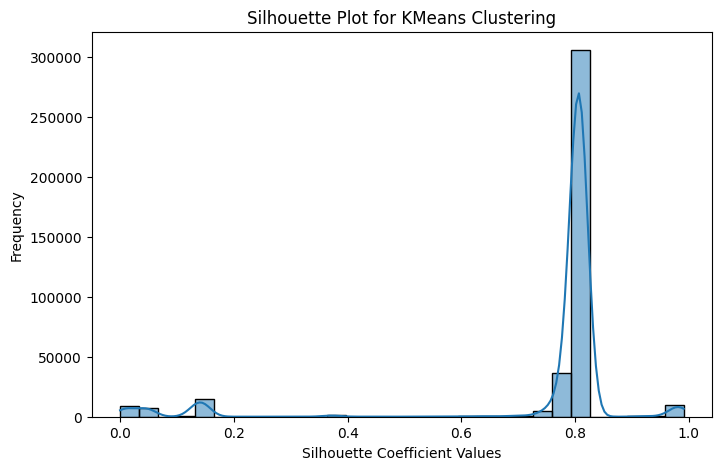

In [13]:
sample_silhouette_values = silhouette_samples(features_scaled, kmeans_labels)

plt.figure(figsize=(8, 5))
sns.histplot(sample_silhouette_values, bins=30, kde=True)
plt.title("Silhouette Plot for KMeans Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Frequency")
plt.show()

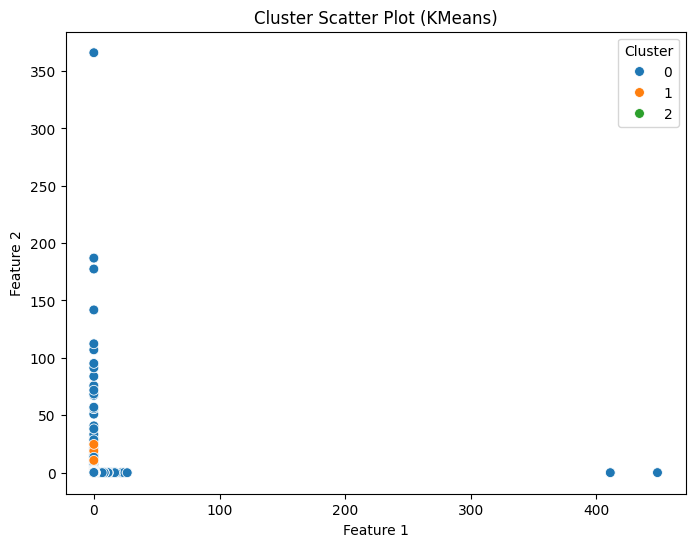

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=kmeans_labels, palette='tab10', s=50)
plt.title("Cluster Scatter Plot (KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()